In [2]:
import pandas as pd

In [23]:
house_price_dataset = pd.read_csv("C:/Users/N.Hasmitha krishna/Downloads/HousingData.csv")

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [25]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [26]:
house_price_dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [27]:
house_price_dataset['CRIM'].fillna(value=house_price_dataset['CRIM'].mode()[0],inplace=True)

In [28]:
house_price_dataset['ZN'].fillna(value=house_price_dataset['ZN'].mode()[0],inplace=True)


In [29]:
house_price_dataset['INDUS'].fillna(value=house_price_dataset['INDUS'].mode()[0],inplace=True)

In [30]:
house_price_dataset['CHAS'].fillna(value=house_price_dataset['CHAS'].mode()[0],inplace=True)


In [31]:
house_price_dataset['AGE'].fillna(value=house_price_dataset['AGE'].mode()[0],inplace=True)


In [32]:
house_price_dataset['LSTAT'].fillna(value=house_price_dataset['LSTAT'].mode()[0],inplace=True)

In [33]:
house_price_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [34]:
house_price_dataset.shape

(506, 14)

In [37]:
house_price_dataset.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593   69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120   76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976   91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794   89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  100.0  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1    

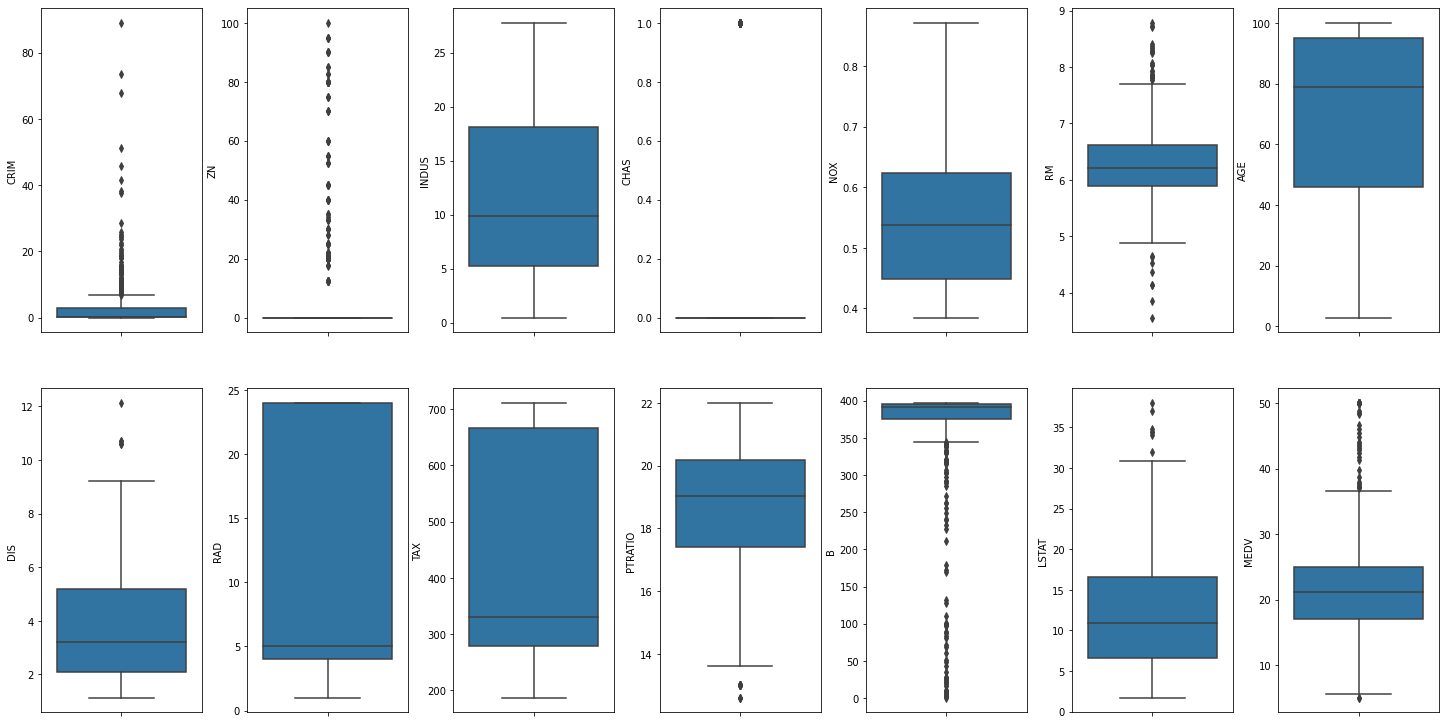

In [70]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in house_price_dataset.items():
    sns.boxplot(y=k, data=house_price_dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [38]:
correlation = house_price_dataset.corr()

In [39]:
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.469705,10.768775,11.361304,0.067194,0.554695,6.284634,69.762846,3.795043,9.549407,408.237154,18.455534,356.674032,12.464229,22.532806
std,8.574515,23.025124,6.837487,0.250605,0.115878,0.702617,28.118032,2.105710,8.707259,168.537116,2.164946,91.294864,7.121443,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.068907,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,6.590000,17.025000
50%,0.224635,0.000000,9.900000,0.000000,0.538000,6.208500,79.050000,3.207450,5.000000,330.000000,19.050000,391.440000,10.925000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,94.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


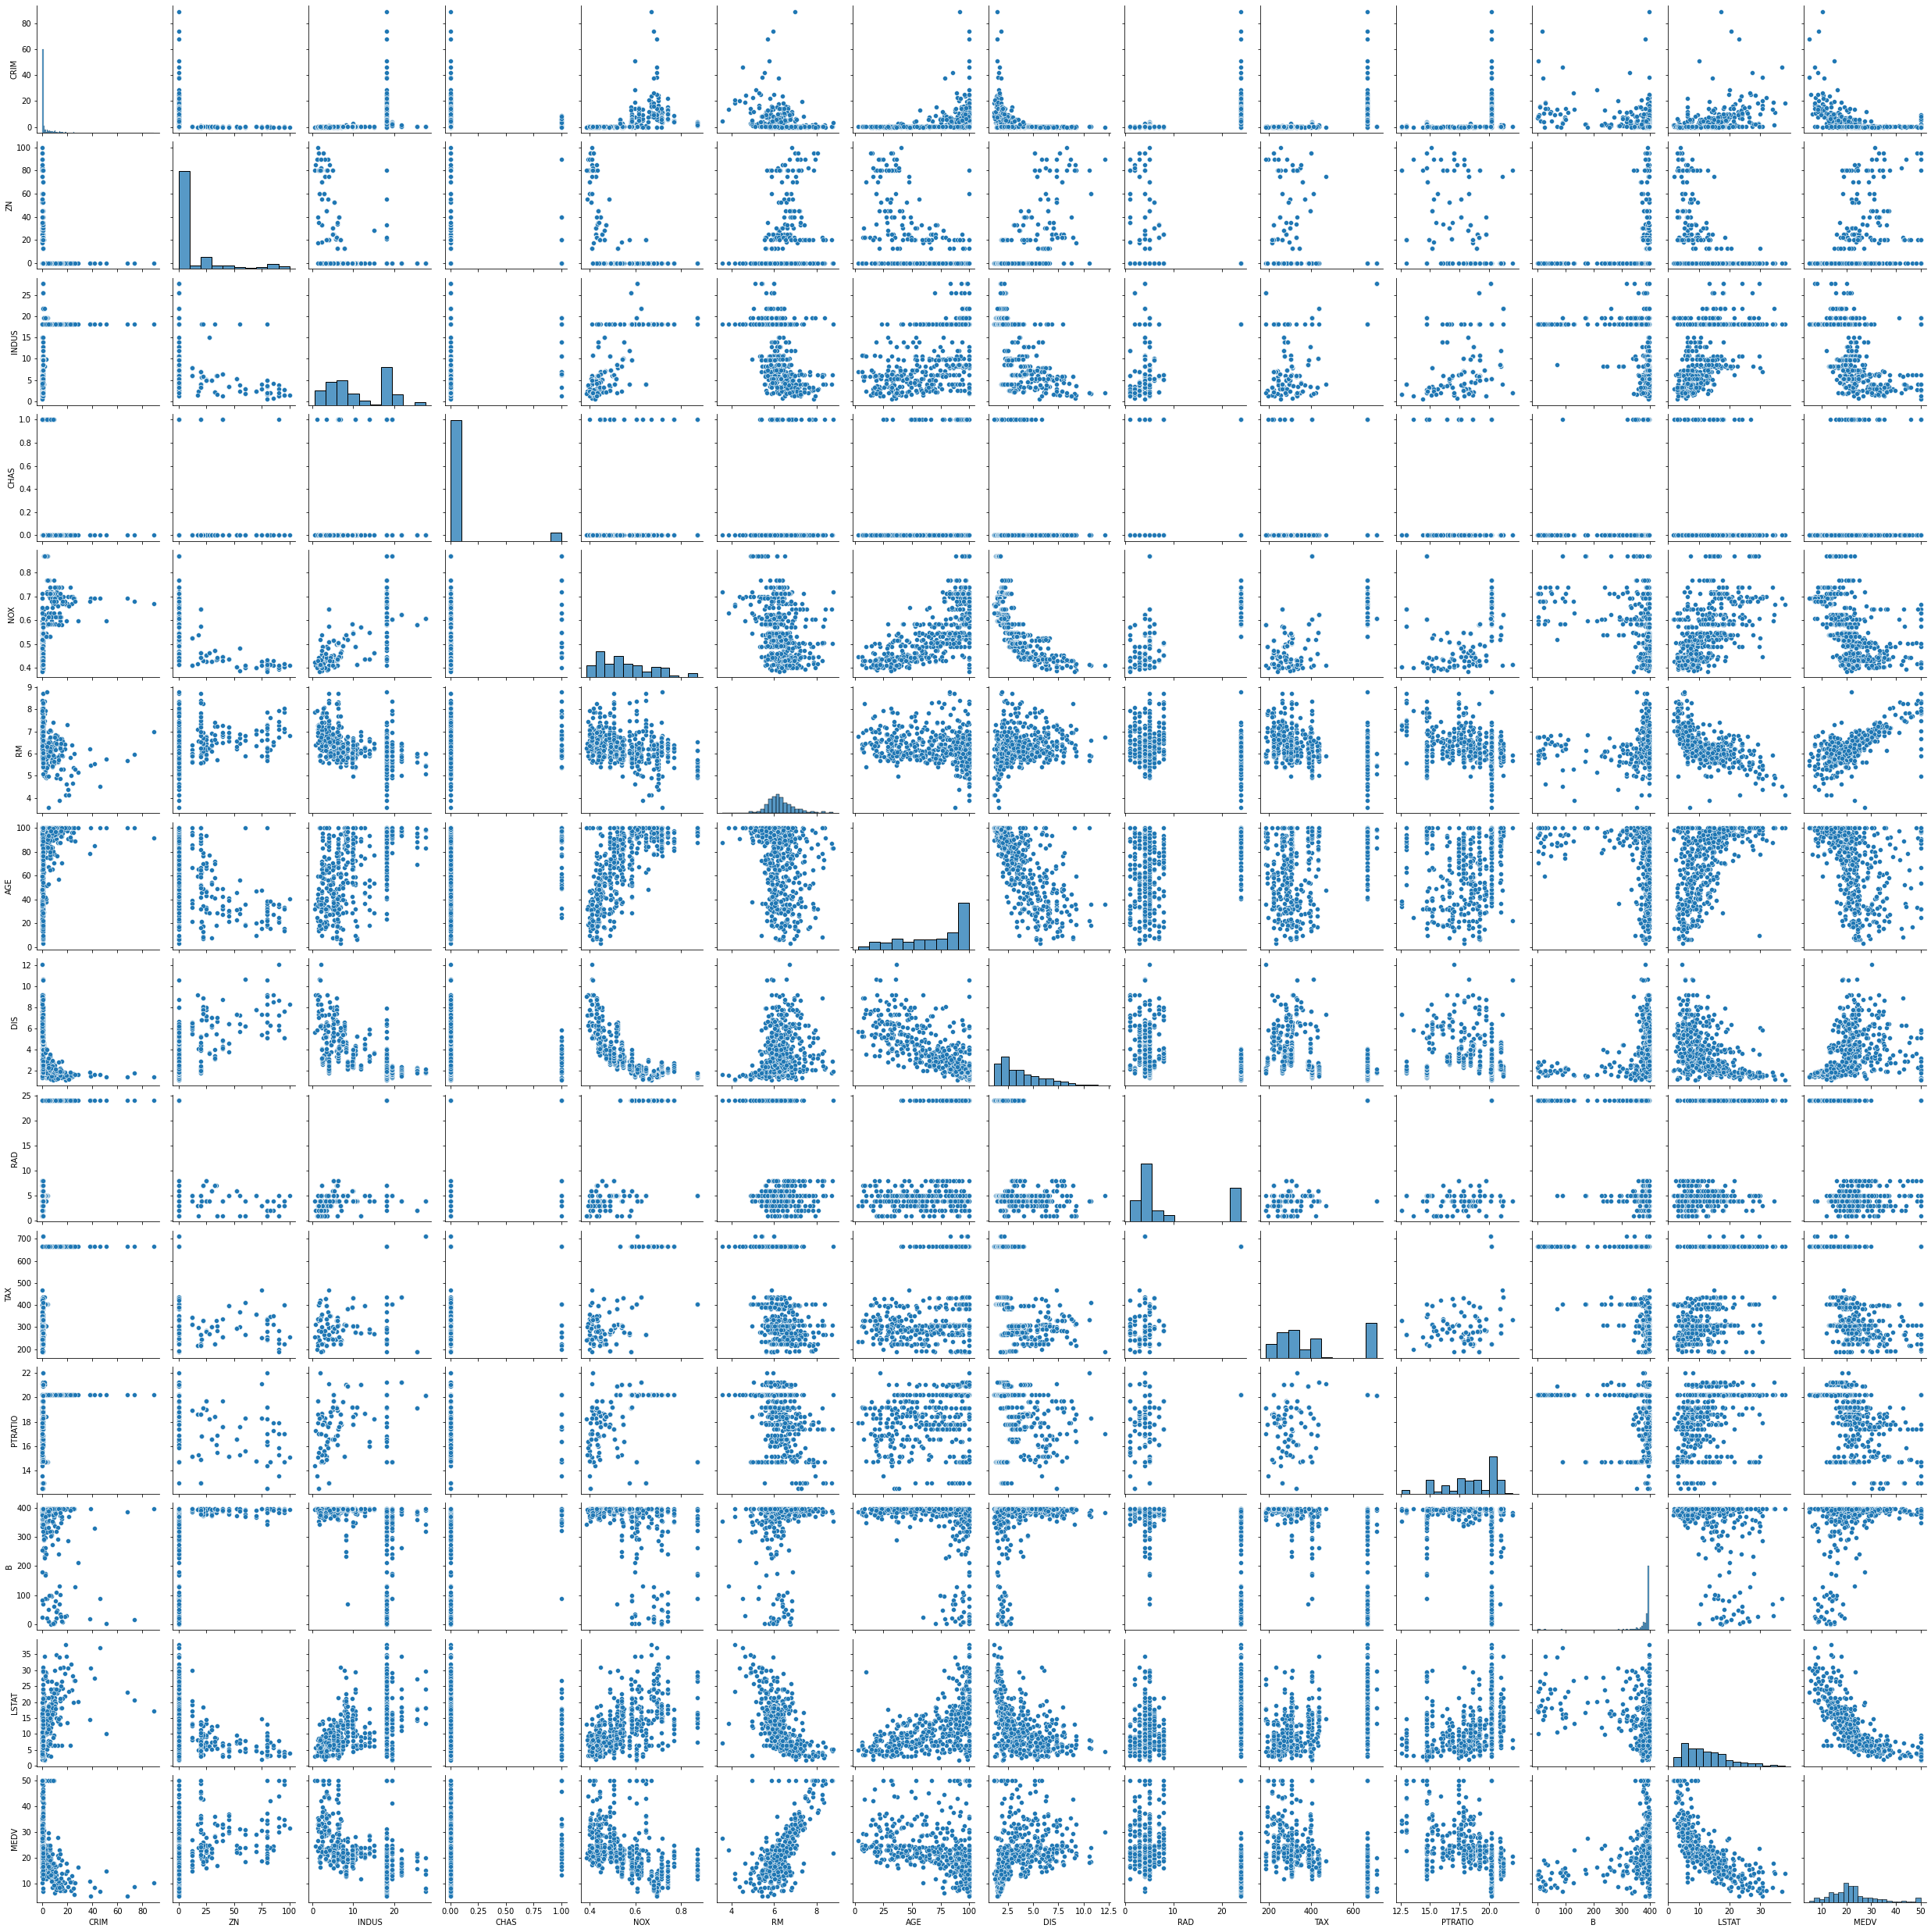

In [41]:
sns.pairplot(house_price_dataset)

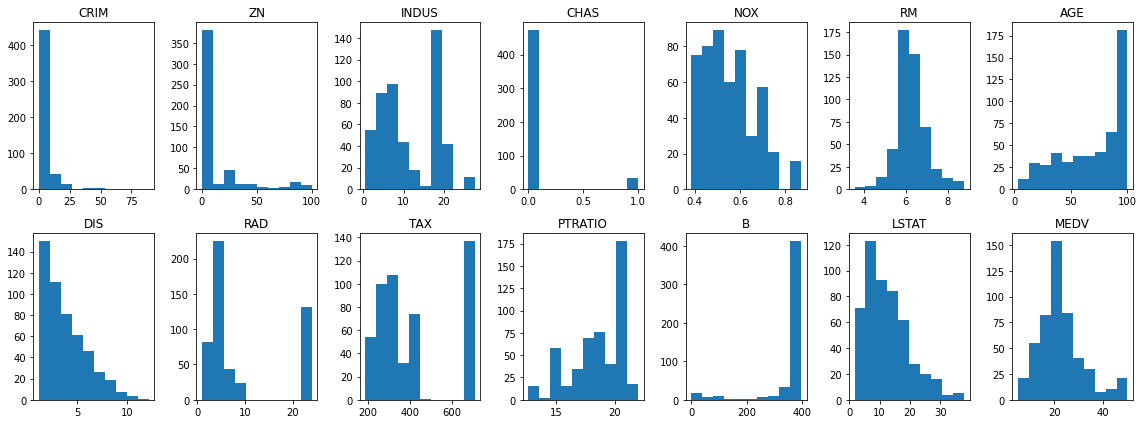

In [42]:
rows =2
cols =7
fig,ax =plt.subplots(nrows=rows ,ncols=cols, figsize=(16,6))
col=house_price_dataset.columns
index=0
for i in range(rows):
    for j in range(cols):
        ax[i][j].hist(df[col[index]])
        ax[i][j].set_title(col[index])
        index=index+1
plt.tight_layout()
plt.show()

In [43]:
corrmat=house_price_dataset.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185547,0.379754,-0.055705,0.410921,-0.220323,0.329308,-0.365909,0.600548,0.559916,0.278227,-0.364913,0.430490,-0.384108
ZN,-0.185547,1.000000,-0.497913,-0.032992,-0.498619,0.312295,-0.527256,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.385937,0.362292
INDUS,0.379754,-0.497913,1.000000,0.050288,0.735691,-0.389362,0.610734,-0.687672,0.580946,0.697661,0.372694,-0.344783,0.566693,-0.478199
CHAS,-0.055705,-0.032992,0.050288,1.000000,0.070867,0.106797,0.077579,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.044653,0.183844
NOX,0.410921,-0.498619,0.735691,0.070867,1.000000,-0.302188,0.700357,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.568643,-0.427321
RM,-0.220323,0.312295,-0.389362,0.106797,-0.302188,1.000000,-0.230265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602263,0.695360
AGE,0.329308,-0.527256,0.610734,0.077579,0.700357,-0.230265,1.000000,-0.711525,0.431239,0.483619,0.254734,-0.270793,0.561439,-0.363636
DIS,-0.365909,0.632428,-0.687672,-0.092318,-0.769230,0.205246,-0.711525,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.476652,0.249929
RAD,0.600548,-0.300061,0.580946,-0.003339,0.611441,-0.209847,0.431239,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.459460,-0.381626
TAX,0.559916,-0.304385,0.697661,-0.035822,0.668023,-0.292048,0.483619,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.516273,-0.468536


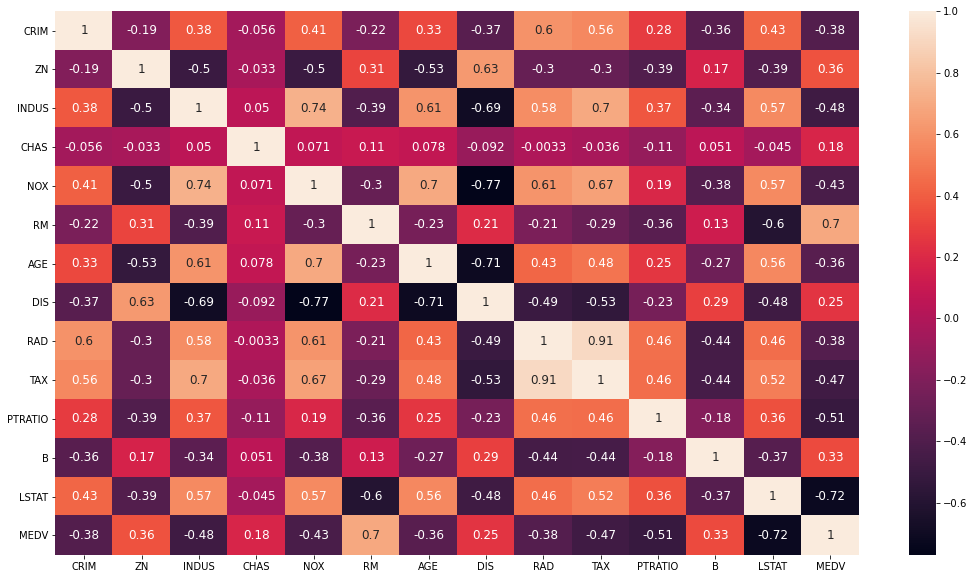

In [44]:
plt.subplots(figsize=(18,10))
sns.heatmap(corrmat,annot=True,annot_kws={'size':12})
plt.show()

In [45]:
x=house_price_dataset.drop(['MEDV'],axis=1)
y=house_price_dataset['MEDV']

In [46]:
print(x)

        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593   69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120   76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976   91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794   89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  100.0  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83 

In [47]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [49]:
print(x.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


In [50]:
#loading the model
model=XGBRegressor()

In [51]:

#training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
#prediction of training data
training_data_prediction=model.predict(X_train)

In [53]:

print(training_data_prediction)

[23.087523  20.965273  20.092651  34.683212  13.8931055 13.5109625
 21.999653  15.1847725 10.904766  22.67784   13.8223915  5.5956454
 29.798058  49.999935  34.89834   20.61764   23.378773  19.210564
 32.700867  19.610727  27.000978   8.400895  46.005917  21.693241
 27.053457  19.340668  19.307596  24.799402  22.62043   31.696245
 18.525696   8.704811  17.4116    23.69749   13.300114  10.49585
 12.695523  25.008577  19.679241  14.877315  24.215343  24.995869
 14.897677  17.003675  15.603833  12.69596   24.500937  15.012113
 49.999435  17.540346  21.19889   32.01204   15.6001005 22.903334
 19.293728  18.70663   23.2985    37.20244   30.098976  33.0969
 20.98841   49.99735   13.397421   5.0101247 16.502342   8.413304
 28.653679  19.502792  20.596212  45.399418  39.807262  33.401424
 19.811823  33.40544   25.284971  49.993565  12.507571  17.432934
 18.611403  22.592594  50.00402   23.780697  23.301455  23.098972
 41.69739   16.10775   31.616262  36.087273   6.9980636 20.378546
 19.997738 

In [54]:
#R squared error
score_1=metrics.r2_score(Y_train,training_data_prediction)

#mean absolute error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

print('R squared error-',score_1)

print('mean absolute error-',score_2)

R squared error- 0.999996930646608
mean absolute error- 0.011159435829313715


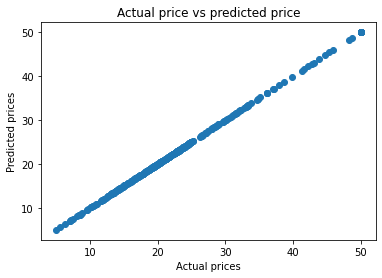

In [55]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title('Actual price vs predicted price')
plt.show()

In [56]:
#PREDICTION ON TEST DATA

In [57]:
test_data_prediction=model.predict(X_test)

In [58]:
#R squared error
score_1=metrics.r2_score(Y_test,test_data_prediction)

#mean absolute error
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)

print('R squared error-',score_1)

print('mean absolute error-',score_2)
     

R squared error- 0.8174399620512722
mean absolute error- 2.3728680077721087


In [62]:
y_predict=model.predict(X_test)

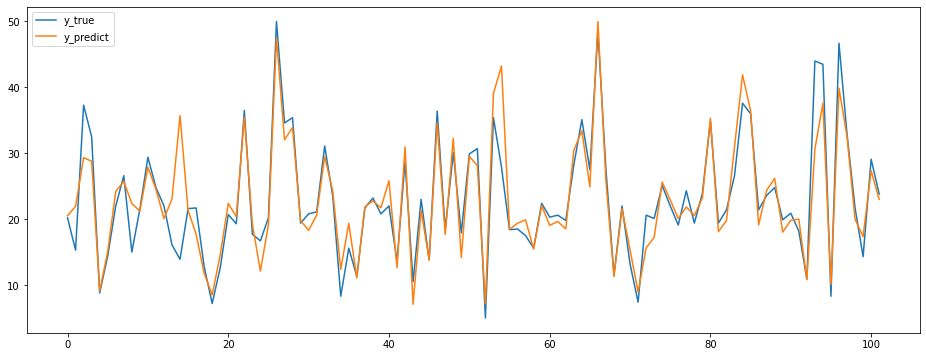

In [63]:
plt.subplots(figsize=(16,6))
x_points =list(range(len(Y_test)))
plt.plot(x_points,Y_test,label='y_true')
plt.plot(x_points,y_predict,label='y_predict')
plt.legend()
plt.show()